In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img+video1+video2

In [2]:
# Paths
img_path="images/1111.jpg"
video1_path="images/BEAUTIFUL WATERFALL green screen FULL HD video.mp4"
video2_path="images/video.mp4"

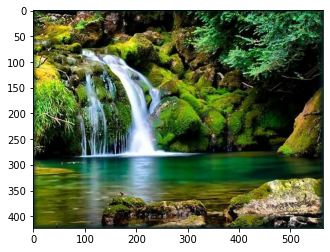

In [3]:
#read images
img=cv2.imread(img_path)

img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.show()

In [4]:
video1=cv2.VideoCapture(video1_path)
video2=cv2.VideoCapture(video2_path)

while video1.isOpened() and video2.isOpened():
    #read videos
    ret1,kadr1=video1.read()
    ret2,kadr2=video2.read()
    if not (ret1 and ret2):
        break
    #resize
    kadr1=cv2.resize(kadr1,(img.shape[1],img.shape[0]))
    kadr2=cv2.resize(kadr2,(img.shape[1],img.shape[0]))
    # copy frame
    kadr1_copy=np.copy(kadr1)
    kadr2_copy=np.copy(kadr2)
    img_copy=np.copy(img)
    #make to mask with frames
    mask1=cv2.inRange(kadr1,np.array([0,150,0]),np.array([150,255,150]))
    mask2=cv2.inRange(kadr2,np.array([0,150,0]),np.array([150,255,150]))
    #Cropping img by mask
    img_copy[mask1==0]=[0,0,0]
    img_copy[mask2==0]=[0,0,0]
    #Cropping frames by mask
    kadr1_copy[mask1 != 0]=[0,0,0]
    kadr2_copy[mask2 != 0]=[0,0,0]
    #result and show
    cinema=img_copy+kadr1_copy+kadr2_copy
    cv2.imshow("video",cinema)

    if cv2.waitKey(40) & 0xFF==ord('q'):
        break

video1.release()
video2.release()
cv2.destroyAllWindows()